# 📊 Análise dos Dados Meteorológicos - Weather ETL API
Este notebook se conecta à API REST do projeto Weather ETL para obter e analisar dados meteorológicos coletados automaticamente.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

sns.set(style="whitegrid")

## 🔍 Verificação de saúde da API

In [2]:
BASE_URL = "http://localhost:8000"
resp = requests.get(f"{BASE_URL}/health")
print("Health Check:", resp.json())

Health Check: {'status': 'healthy', 'timestamp': '2025-07-02T01:33:57.046158+00:00', 'database_connected': True, 'version': '1.0.0'}


## 📦 Dados Meteorológicos Mais Recentes

In [3]:
latest = requests.get(f"{BASE_URL}/weather/latest").json()
print(latest)

{'id': 69, 'city_id': 3451190, 'city_name': 'Rio de Janeiro', 'country_code': 'BR', 'latitude': -22.9028, 'longitude': -43.2075, 'temperature': 19.98, 'temperature_feels_like': 20.49, 'temperature_min': 19.98, 'temperature_max': 20.0, 'pressure': 1024, 'humidity': 94, 'weather_main': 'Mist', 'weather_description': 'névoa', 'wind_speed': 6.17, 'wind_direction': 250, 'cloudiness': 100, 'visibility': 4500, 'data_timestamp': '2025-07-02T01:29:08', 'heat_index': 41.98, 'temperature_category': 'Ameno', 'humidity_category': 'Alta', 'created_at': '2025-07-02T01:33:48.143104'}


## 🏙️ Dados Históricos por Cidade

In [4]:
params = {"city": "São Paulo", "limit": 100}
response = requests.get(f"{BASE_URL}/weather/by_city", params=params)
data = response.json()
df = pd.DataFrame(data)

# Formatar as datas
df['data_timestamp'] = pd.to_datetime(df['data_timestamp'], format='ISO8601').dt.normalize()
df['created_at'] = pd.to_datetime(df['created_at'], format='ISO8601').dt.normalize()

df = df.sort_values('data_timestamp')
df.head()

,id,city_id,city_name,country_code,latitude,longitude,temperature,temperature_feels_like,temperature_min,temperature_max,...,weather_description,wind_speed,wind_direction,cloudiness,visibility,data_timestamp,heat_index,temperature_category,humidity_category,created_at
14,1,NaN,São Paulo,BR,-23.5475,-46.6361,25.00,NaN,NaN,NaN,...,céu limpo,NaN,NaN,NaN,NaN,2025-06-29,NaN,Ameno,Moderada,2025-06-29
9,23,3448439.0,São Paulo,BR,-23.5475,-46.6361,18.74,18.73,16.75,21.20,...,céu limpo,1.54,340.0,0.0,10000.0,2025-06-30,33.24,Ameno,Alta,2025-06-30
10,18,3448439.0,São Paulo,BR,-23.5475,-46.6361,18.86,18.84,16.75,21.36,...,céu limpo,1.54,340.0,0.0,10000.0,2025-06-30,32.86,Ameno,Alta,2025-06-30
11,13,3448439.0,São Paulo,BR,-23.5475,-46.6361,19.99,20.08,16.94,21.92,...,céu limpo,1.54,340.0,0.0,10000.0,2025-06-30,33.99,Ameno,Alta,2025-06-30
12,8,3448439.0,São Paulo,BR,-23.5475,-46.6361,18.90,18.91,17.75,21.92,...,céu limpo,0.00,0.0,0.0,10000.0,2025-06-30,33.40,Ameno,Alta,2025-06-30


## ✅ Verificação de Integridade dos Dados

In [5]:
print("Tipos de dados:\n", df.dtypes)
print("\nValores nulos:\n", df.isnull().sum())
print("\nResumo estatístico:")
df.describe()

Tipos de dados:
 id                                 int64
city_id                          float64
city_name                         object
country_code                      object
latitude                         float64
longitude                        float64
temperature                      float64
temperature_feels_like           float64
temperature_min                  float64
temperature_max                  float64
pressure                           int64
humidity                           int64
weather_main                      object
weather_description               object
wind_speed                       float64
wind_direction                   float64
cloudiness                       float64
visibility                       float64
data_timestamp            datetime64[ns]
heat_index                       float64
temperature_category              object
humidity_category                 object
created_at                datetime64[ns]
dtype: object

Valores nulos:
 id       

,id,city_id,latitude,longitude,temperature,temperature_feels_like,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_direction,cloudiness,visibility,data_timestamp,heat_index,created_at
count,15.000000,14.0,1.500000e+01,1.500000e+01,15.000000,14.000000,14.000000,14.000000,15.000000,15.000000,14.000000,14.000000,14.000000,14.000000,15,14.000000,15
mean,33.200000,3448439.0,-2.354750e+01,-4.663610e+01,16.360667,15.605714,14.703571,17.050000,1023.266667,84.133333,3.121429,174.928571,53.571429,9714.285714,2025-06-30 17:36:00,33.493571,2025-06-30 17:36:00
min,1.000000,3448439.0,-2.354750e+01,-4.663610e+01,12.100000,11.770000,11.360000,13.030000,1013.000000,65.000000,0.000000,0.000000,0.000000,8000.000000,2025-06-29 00:00:00,32.680000,2025-06-29 00:00:00
25%,15.500000,3448439.0,-2.354750e+01,-4.663610e+01,13.870000,13.605000,13.072500,14.967500,1020.000000,79.000000,1.540000,120.000000,0.000000,10000.000000,2025-06-30 00:00:00,32.880000,2025-06-30 00:00:00
50%,33.000000,3448439.0,-2.354750e+01,-4.663610e+01,15.560000,15.285000,14.690000,16.160000,1024.000000,88.000000,3.600000,180.000000,75.000000,10000.000000,2025-07-01 00:00:00,33.285000,2025-07-01 00:00:00
75%,50.500000,3448439.0,-2.354750e+01,-4.663610e+01,18.800000,18.550000,16.750000,20.495000,1025.500000,89.000000,4.252500,190.000000,75.000000,10000.000000,2025-07-01 00:00:00,34.005000,2025-07-01 00:00:00
max,68.000000,3448439.0,-2.354750e+01,-4.663610e+01,25.000000,20.080000,17.750000,21.920000,1029.000000,92.000000,5.810000,340.000000,100.000000,10000.000000,2025-07-02 00:00:00,34.700000,2025-07-02 00:00:00
std,22.036334,0.0,7.354816e-15,1.470963e-14,3.552762,2.869695,2.246873,3.301853,4.182731,7.308182,1.915535,108.745620,42.581531,611.249846,NaN,0.729611,NaN


## 🌡️ Temperatura ao Longo do Tempo

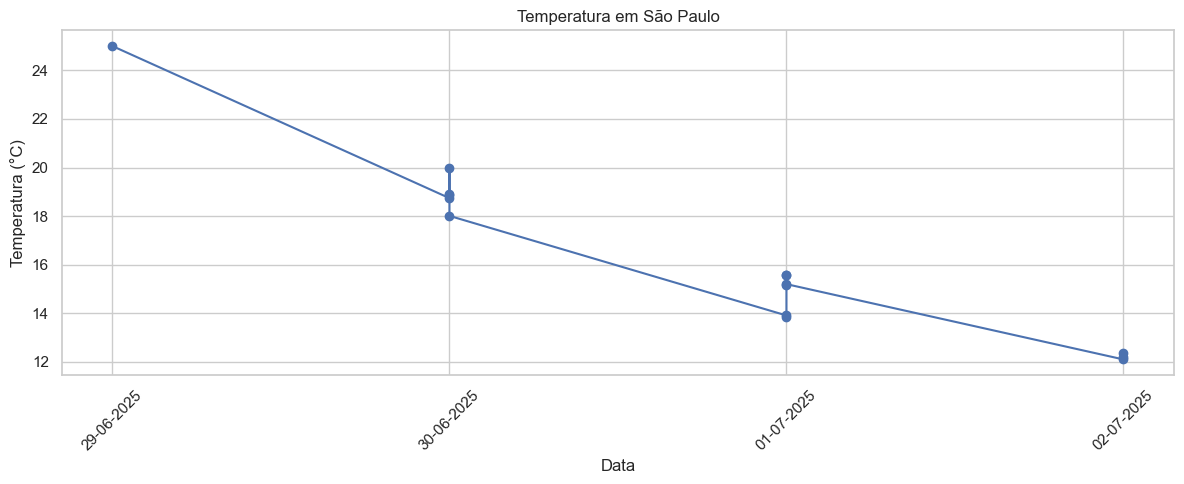

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(df['data_timestamp'], df['temperature'], marker='o', linestyle='-')
plt.title("Temperatura em São Paulo")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")
plt.grid(True)

# Formatar eixo X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 💧 Umidade ao Longo do Tempo

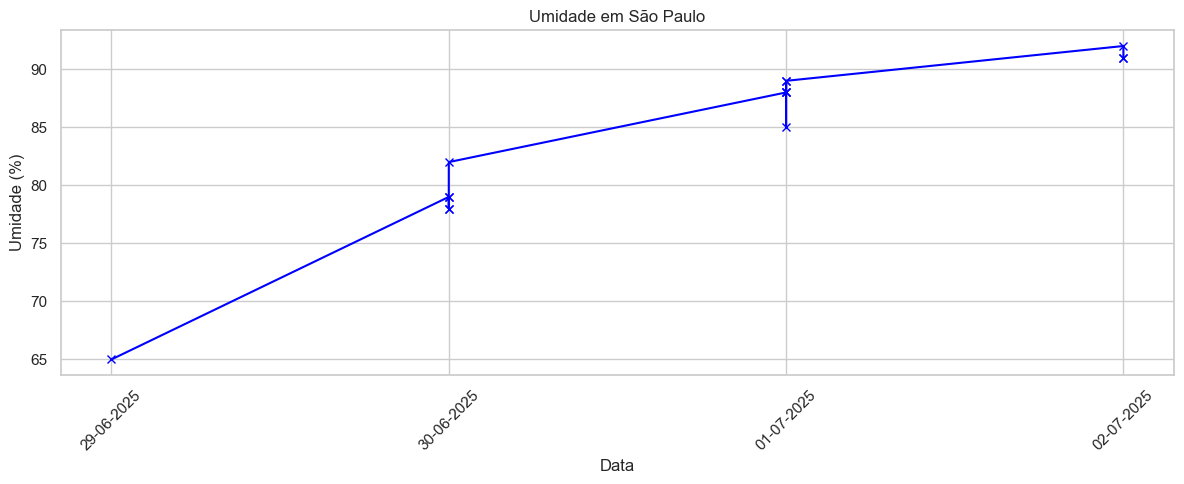

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(df['data_timestamp'], df['humidity'], marker='x', color='blue')
plt.title("Umidade em São Paulo")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")
plt.grid(True)

# Formatar eixo X 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧭 Pressão Atmosférica ao Longo do Tempo

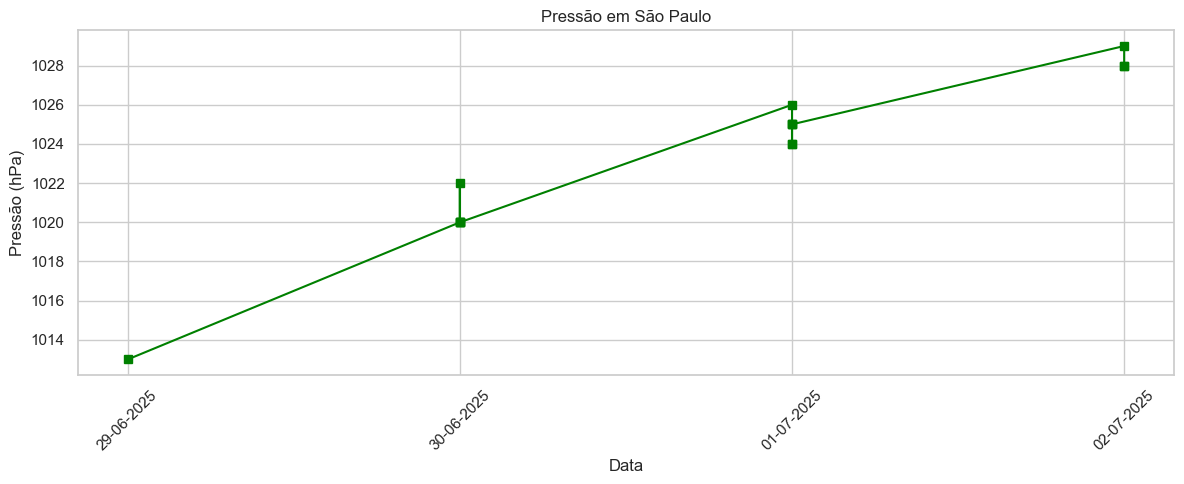

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(df['data_timestamp'], df['pressure'], marker='s', color='green')
plt.title("Pressão em São Paulo")
plt.xlabel("Data")
plt.ylabel("Pressão (hPa)")
plt.grid(True)

# Formatar eixo X 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔁 Correlação entre Variáveis

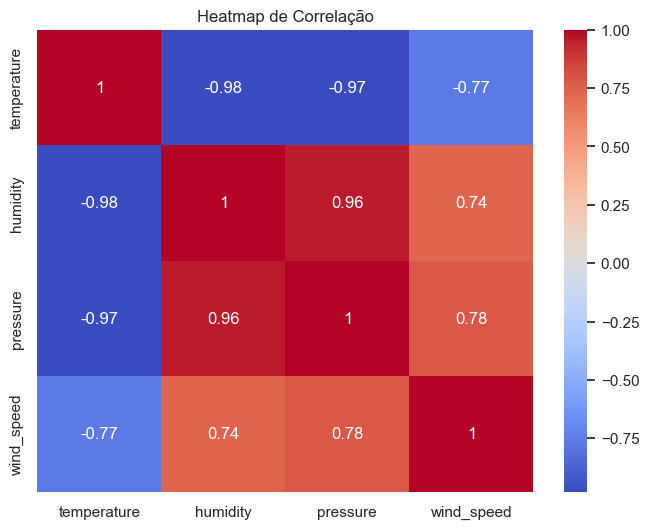

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['temperature', 'humidity', 'pressure', 'wind_speed']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de Correlação")
plt.show()

## 📦 Boxplot de Temperatura

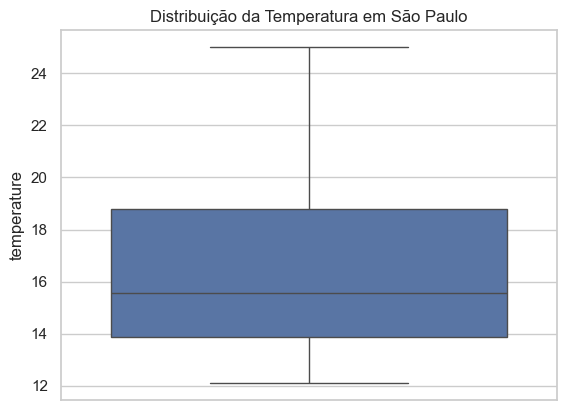

In [10]:
sns.boxplot(data=df, y='temperature')
plt.title("Distribuição da Temperatura em São Paulo")
plt.show()